In [1]:
import fastai
from fastai.vision.all import *
from pathlib import Path
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm
import cv2

In [2]:
root_path = Path("mvtec_classification")

In [3]:
def get_label(x):
    label = x.parent.parent.parent.name    
    return label

In [4]:
block = DataBlock(blocks=(ImageBlock, CategoryBlock), 
                 get_items=get_image_files, 
                 splitter=RandomSplitter(),
                 get_y=get_label,
                 item_tfms=Resize(256),
                 batch_tfms=aug_transforms()+[Normalize.from_stats(*imagenet_stats)])

In [5]:
dls = block.dataloaders(root_path, batch_size=64)

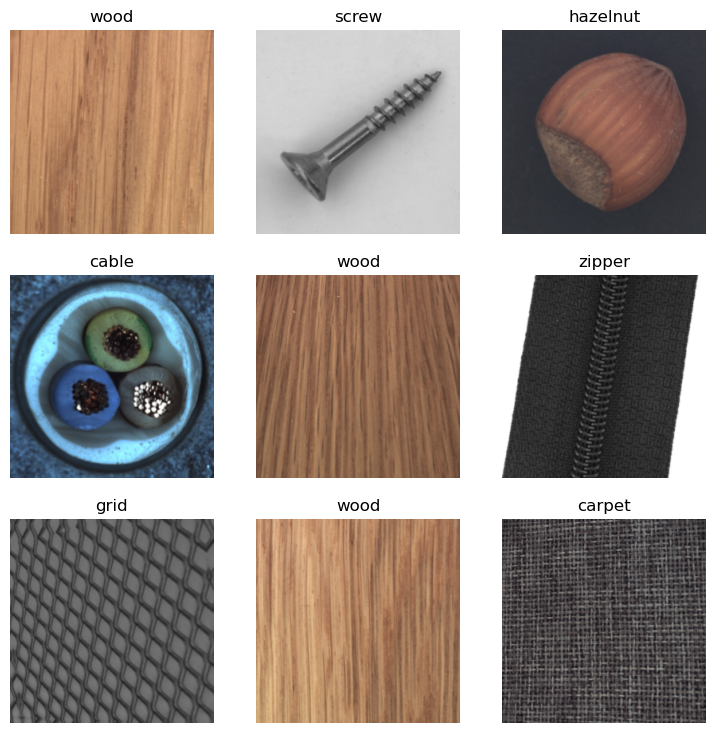

In [6]:
dls.show_batch(max_n=9)

In [7]:
learn = vision_learner(dls, resnet18, metrics=error_rate)

/home/iot_workshop_22/anaconda3/envs/workshop/lib/python3.8/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
/home/iot_workshop_22/anaconda3/envs/workshop/lib/python3.8/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [8]:
learn.unfreeze()

In [9]:
learn.fit_one_cycle(10)

epoch,train_loss,valid_loss,error_rate,time
0,0.321569,0.000023,0.000000,00:16
1,0.085184,0.000012,0.000000,00:16
2,0.056302,0.004597,0.000000,00:16
3,0.024759,0.016867,0.003663,00:16
4,0.023791,0.134986,0.051282,00:17
5,0.019083,0.000204,0.000000,00:16
6,0.009740,0.000005,0.000000,00:17
7,0.004347,0.000010,0.000000,00:15
8,0.001833,0.000003,0.000000,00:16
9,0.002418,0.000003,0.000000,00:16


In [10]:
learn.save("classification_all_stage_1_resnet18")

Path('models/classification_all_stage_1_resnet18.pth')

In [11]:
learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,error_rate,time
0,0.001310,0.395583,0.119658,00:16
1,0.139262,0.129188,0.025641,00:17
2,0.057220,0.000260,0.000000,00:16
3,0.042937,0.000024,0.000000,00:16
4,0.016624,0.000010,0.000000,00:16


In [12]:
learn.save("classification_all_stage_2_resnet18")

Path('models/classification_all_stage_2_resnet18.pth')

In [ ]:
learn.show_results()

In [ ]:
interp = Interpretation.from_learner(learn)

In [ ]:
interp.plot_top_losses(9, figsize=(15,10))